# Exercicio de Sala - PANDAS - Exploração e Análise de Dados - EDA

Nesse exercicio trabalharemos com dados fictícios de investidores.

São 3 arquivos que devem ser carregados para responder as perguntas abaixo.



Informações

Cadastro:
- **id** : Identificação do investidor
- **Nome** : Nome completo do investidor 
- **Sexo** : Feminino ou masculino
- **Nasc** : Data de nascimento
- **Idade** : Idade do investidor ou responsável
- **Email** : E-mail do investidor ou responsável
- **Lat_long** : Dados geográficos do investidor
- **Job** : Profissão do investidor ou do seu responsável (em inglês)
- **Estado** : Estado onde o investidor reside

Investimento:
- **id** : Identificação do investidor
- **Salario** : Renda do investidor ou seu responsável
- **Perfil** : Perfil de investimento
- **Ativo01, Ativo02, Ativo03, Ativo04, Ativo05, Ativo06, Ativo07** : O quanto de dinheiro o investidor colocou em cada ativo
- **Nota1, Nota2** : O quanto o investidor está satisfeito com nossa empresa (2 avaliações)

Lembrando que esses dados são irreais e fictícios


Pode ser feito o download e carregar localmente ou pode acessar os arquivos pelo link diretamente no pandas:
    
- https://raw.githubusercontent.com/renatapink/DSdegree/master/Modulo2/Mini_projeto1/cadastro.csv
- https://raw.githubusercontent.com/renatapink/DSdegree/master/Modulo2/Mini_projeto1/investimento_parte1.csv
- https://raw.githubusercontent.com/renatapink/DSdegree/master/Modulo2/Mini_projeto1/investimento_parte2.csv

In [2]:
import pandas as pd
import datetime as dt
pd.options.display.max_columns = 35 #para aumentar a quantidade de colunas a serem visualizadas

In [3]:
df_cadastro = pd.read_csv("cadastro.csv")
df_investimento_1 = pd.read_csv("investimento_parte1.csv")
df_investimento_2 = pd.read_csv("investimento_parte2.csv")

In [4]:
df_cadastro.shape, df_investimento_1.shape, df_investimento_2.shape

((38754, 9), (20000, 12), (24052, 12))

In [5]:
df_investimento_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       20000 non-null  object 
 1   Salario  20000 non-null  object 
 2   Perfil   20000 non-null  object 
 3   Ativo01  15012 non-null  float64
 4   Ativo02  16857 non-null  float64
 5   Ativo03  16760 non-null  float64
 6   Ativo04  13799 non-null  float64
 7   Ativo05  16829 non-null  float64
 8   Ativo06  9895 non-null   float64
 9   Ativo07  20000 non-null  float64
 10  Nota1    18469 non-null  float64
 11  Nota2    18954 non-null  float64
dtypes: float64(9), object(3)
memory usage: 1.8+ MB


In [6]:
df_investimento_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24052 entries, 0 to 24051
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       24052 non-null  object 
 1   Salario  24052 non-null  object 
 2   Perfil   24052 non-null  object 
 3   Ativo01  17994 non-null  float64
 4   Ativo02  20245 non-null  float64
 5   Ativo03  20249 non-null  float64
 6   Ativo04  16685 non-null  float64
 7   Ativo05  20211 non-null  float64
 8   Ativo06  11932 non-null  float64
 9   Ativo07  24052 non-null  float64
 10  Nota1    22172 non-null  float64
 11  Nota2    22810 non-null  float64
dtypes: float64(9), object(3)
memory usage: 2.2+ MB


In [7]:
df_cadastro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38754 entries, 0 to 38753
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        38754 non-null  object
 1   Nome      38754 non-null  object
 2   Sexo      38754 non-null  object
 3   Nasc      38754 non-null  object
 4   Idade     38754 non-null  int64 
 5   Email     38754 non-null  object
 6   Lat_long  38754 non-null  object
 7   Job       38754 non-null  object
 8   Estado    38754 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.7+ MB


## 2 - Juntar os dataframes de investimento1 e investimento2 em um só e ver a quantidade de linhas

Criar um novo dataframe  
Dica: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [8]:
df_investimento = pd.concat([df_investimento_1, df_investimento_2], ignore_index=True)

In [9]:
df_investimento.shape

(44052, 12)

## 3 - Crie um novo dataframe eliminando as linhas duplicadas do item anterior

In [10]:
df_investimento = df_investimento.drop_duplicates()

In [11]:
df_investimento.shape

(38754, 12)

## 4 - Junte o dataframe de investimento com o de cadastro, criando um novo dataframe
Dica: use a coluna id como chave para juntar os dois dataframes

In [13]:
df_cadastro_investimento = pd.merge(df_cadastro, df_investimento, on='id', how='outer')


In [14]:
df_cadastro_investimento.head()

,id,Nome,Sexo,Nasc,Idade,Email,Lat_long,Job,Estado,Salario,Perfil,Ativo01,Ativo02,Ativo03,Ativo04,Ativo05,Ativo06,Ativo07,Nota1,Nota2
0,id0000001,Eunice Hellen do Vale,Fem,1970-11-12,51,djones@yahoo.com,"(Decimal('24.7024355'), Decimal('-28.038258'))",Technical author,TO,$63.67,Moderado,1174.27,4980.98,2638.24,NaN,4480.91,2329.72,480.72,79.600372,9.802620
1,id0000002,Sebastião Castelo Branco Júnior,Masc,2019-12-10,2,barnesandrea@yahoo.com,"(Decimal('21.8589875'), Decimal('122.830566'))","Biochemist, clinical",DF,$21.96,Moderado,842.12,5646.09,3336.07,NaN,5624.22,2669.98,504.17,44.406893,90.512871
2,id0000003,Romildo Fábio de Carvalho,Masc,2015-12-28,6,walkermichael@yahoo.com,"(Decimal('-28.2161525'), Decimal('97.140529'))","Development worker, international aid",DF,$62497.64,Agressivo,818.81,5516.52,3396.64,NaN,5033.83,2229.45,523.12,44.020024,65.060941
3,id0000004,Lana Albina de Lemos Mumy,Fem,1993-05-03,28,cobbangela@hotmail.com,"(Decimal('-40.8557635'), Decimal('-2.936099'))",Estate manager/land agent,DF,$99878.74,Agressivo,NaN,5258.69,3723.10,NaN,5933.91,NaN,486.05,25.597924,86.548918
4,id0000005,Rose Elisângela Vyrnium de Moura,Fem,1984-06-10,37,crawfordcraig@yahoo.com,"(Decimal('-20.2620885'), Decimal('104.349223'))",Chartered public finance accountant,MS,$188.01,Conservador,1505.16,6415.30,3462.67,30841.35,6044.86,2198.89,512.98,14.463307,33.566292


## 5 - Ordene o dataframe pelo id, de forma crescente e redefina o índice

In [15]:
df_cadastro_investimento = df_cadastro_investimento.sort_values("id")
df_cadastro_investimento.set_index("id", inplace=True)
df_cadastro_investimento.head()

,Nome,Sexo,Nasc,Idade,Email,Lat_long,Job,Estado,Salario,Perfil,Ativo01,Ativo02,Ativo03,Ativo04,Ativo05,Ativo06,Ativo07,Nota1,Nota2
id,,,,,,,,,,,,,,,,,,,
id0000001,Eunice Hellen do Vale,Fem,1970-11-12,51,djones@yahoo.com,"(Decimal('24.7024355'), Decimal('-28.038258'))",Technical author,TO,$63.67,Moderado,1174.27,4980.98,2638.24,NaN,4480.91,2329.72,480.72,79.600372,9.802620
id0000002,Sebastião Castelo Branco Júnior,Masc,2019-12-10,2,barnesandrea@yahoo.com,"(Decimal('21.8589875'), Decimal('122.830566'))","Biochemist, clinical",DF,$21.96,Moderado,842.12,5646.09,3336.07,NaN,5624.22,2669.98,504.17,44.406893,90.512871
id0000003,Romildo Fábio de Carvalho,Masc,2015-12-28,6,walkermichael@yahoo.com,"(Decimal('-28.2161525'), Decimal('97.140529'))","Development worker, international aid",DF,$62497.64,Agressivo,818.81,5516.52,3396.64,NaN,5033.83,2229.45,523.12,44.020024,65.060941
id0000004,Lana Albina de Lemos Mumy,Fem,1993-05-03,28,cobbangela@hotmail.com,"(Decimal('-40.8557635'), Decimal('-2.936099'))",Estate manager/land agent,DF,$99878.74,Agressivo,NaN,5258.69,3723.10,NaN,5933.91,NaN,486.05,25.597924,86.548918
id0000005,Rose Elisângela Vyrnium de Moura,Fem,1984-06-10,37,crawfordcraig@yahoo.com,"(Decimal('-20.2620885'), Decimal('104.349223'))",Chartered public finance accountant,MS,$188.01,Conservador,1505.16,6415.30,3462.67,30841.35,6044.86,2198.89,512.98,14.463307,33.566292


## 6 - Faça uma análise dos dados faltantes e trate-os

Mostre todas as colunas com dados faltantes, sua quantidade/porcentagem e como tratar (preencher) cada uma delas explicando sua estratégia

In [16]:
((df_cadastro_investimento.isna().sum() / len(df_cadastro_investimento)) * 100)

Nome         0.000000
Sexo         0.000000
Nasc         0.000000
Idade        0.000000
Email        0.000000
Lat_long     0.000000
Job          0.000000
Estado       0.000000
Salario      0.000000
Perfil       0.000000
Ativo01     25.091603
Ativo02     15.740311
Ativo03     15.918357
Ativo04     30.672963
Ativo05     15.975125
Ativo06     50.353512
Ativo07      0.000000
Nota1        7.741136
Nota2        5.160758
dtype: float64

## 7 - Manipule os dados a seguir:
- Criar coluna "Total" somando o valor de todos os ativos por investidor
- Criar coluna "Media" com a média das notas 1 e 2
- Criar coluna "Dominio" com apenas o domínio do email (dica: separar por @)
- Mudar o nome da coluna "Salário" para "Renda" e tratar a coluna (sem caracter $ e tipo numérica)
- Mudar os dados da coluna "Sexo" para Masculino e Feminino (tente usar a função map)
- Transformar os dados da coluna Media em inteiro
- Criar coluna "NPS" onde o investidor é classificado como promotor se a média das notas é maior ou igual a 80, como neutro se a média estiver entre 50 e 80, e como detrator se for abaixo de 50


In [17]:
df_cadastro_investimento["total"] = df_cadastro_investimento[["Ativo01", "Ativo02", "Ativo03", "Ativo04", "Ativo05", "Ativo06", "Ativo07"]].sum(axis=1)

In [18]:
df_cadastro_investimento["Media"] = df_cadastro_investimento[["Nota1", "Nota2"]].mean(axis=1)

In [19]:
df_cadastro_investimento["Dominio"] = df_cadastro_investimento["Email"].str.split("@").str[1]

In [20]:
df_cadastro_investimento.rename(columns={"Salario":"Renda"}, inplace=True)
df_cadastro_investimento["Renda"] = df_cadastro_investimento["Renda"].str.replace("$", "").astype(float)

In [21]:
df_cadastro_investimento["Sexo"] = df_cadastro_investimento["Sexo"].apply(lambda x: "Masculino" if x=="Masc" else "Feminino")

In [ ]:
df_cadastro_investimento["Media"] = df_cadastro_investimento["Media"].astype(int)

In [22]:
df_cadastro_investimento["NPS"] = df_cadastro_investimento["Media"].apply(lambda nota: "promotor" if nota >= 80 else ("neutro" if 50 < nota < 80 else "detrator"))

In [23]:
df_cadastro_investimento.head()

,Nome,Sexo,Nasc,Idade,Email,Lat_long,Job,Estado,Renda,Perfil,Ativo01,Ativo02,Ativo03,Ativo04,Ativo05,Ativo06,Ativo07,Nota1,Nota2,total,Media,Dominio,NPS
id,,,,,,,,,,,,,,,,,,,,,,,
id0000001,Eunice Hellen do Vale,Feminino,1970-11-12,51,djones@yahoo.com,"(Decimal('24.7024355'), Decimal('-28.038258'))",Technical author,TO,63.67,Moderado,1174.27,4980.98,2638.24,NaN,4480.91,2329.72,480.72,79.600372,9.802620,16084.84,44.701496,yahoo.com,detrator
id0000002,Sebastião Castelo Branco Júnior,Masculino,2019-12-10,2,barnesandrea@yahoo.com,"(Decimal('21.8589875'), Decimal('122.830566'))","Biochemist, clinical",DF,21.96,Moderado,842.12,5646.09,3336.07,NaN,5624.22,2669.98,504.17,44.406893,90.512871,18622.65,67.459882,yahoo.com,neutro
id0000003,Romildo Fábio de Carvalho,Masculino,2015-12-28,6,walkermichael@yahoo.com,"(Decimal('-28.2161525'), Decimal('97.140529'))","Development worker, international aid",DF,62497.64,Agressivo,818.81,5516.52,3396.64,NaN,5033.83,2229.45,523.12,44.020024,65.060941,17518.37,54.540483,yahoo.com,neutro
id0000004,Lana Albina de Lemos Mumy,Feminino,1993-05-03,28,cobbangela@hotmail.com,"(Decimal('-40.8557635'), Decimal('-2.936099'))",Estate manager/land agent,DF,99878.74,Agressivo,NaN,5258.69,3723.10,NaN,5933.91,NaN,486.05,25.597924,86.548918,15401.75,56.073421,hotmail.com,neutro
id0000005,Rose Elisângela Vyrnium de Moura,Feminino,1984-06-10,37,crawfordcraig@yahoo.com,"(Decimal('-20.2620885'), Decimal('104.349223'))",Chartered public finance accountant,MS,188.01,Conservador,1505.16,6415.30,3462.67,30841.35,6044.86,2198.89,512.98,14.463307,33.566292,50981.21,24.014800,yahoo.com,detrator


## 8 - Calcule os seguintes dados
- Calcule o total investido em cada coluna Ativo (tente usar o apply)
- Qual o menor valor investido em cada ativo?
- Mostre a média e desvio padrão de cada ativo
- Qual o nome e a idade do investidor mais velho?
- Qual a mediana da coluna Média?

In [24]:
df_cadastro_investimento[["Ativo01", "Ativo02", "Ativo03", "Ativo04", "Ativo05", "Ativo06", "Ativo07"]].sum()

Ativo01    3.275569e+07
Ativo02    1.680798e+08
Ativo03    1.023306e+08
Ativo04    4.071340e+08
Ativo05    1.720668e+08
Ativo06    4.462684e+07
Ativo07    1.937903e+07
dtype: float64

In [25]:
df_cadastro_investimento[["Ativo01", "Ativo02", "Ativo03", "Ativo04", "Ativo05", "Ativo06", "Ativo07"]].min()

Ativo01     800.01
Ativo02    4500.05
Ativo03    2500.01
Ativo04    5000.81
Ativo05    4000.14
Ativo06    2000.04
Ativo07     462.93
dtype: float64

In [26]:
df_cadastro_investimento[["Ativo01", "Ativo02", "Ativo03", "Ativo04", "Ativo05", "Ativo06", "Ativo07"]].mean()

Ativo01     1128.339300
Ativo02     5147.296098
Ativo03     3140.418931
Ativo04    15153.681742
Ativo05     5284.120661
Ativo06     2319.482555
Ativo07      500.052452
dtype: float64

In [27]:
df_cadastro_investimento[["Ativo01", "Ativo02", "Ativo03", "Ativo04", "Ativo05", "Ativo06", "Ativo07"]].std()

Ativo01     218.822710
Ativo02     398.676500
Ativo03     395.714600
Ativo04    6972.128306
Ativo05     795.181272
Ativo06     240.669641
Ativo07       9.998218
dtype: float64

In [28]:
# nome e idade
df_cadastro_investimento[df_cadastro_investimento["Nasc"] == df_cadastro_investimento["Nasc"].min()][["Nome", "Idade"]]


,Nome,Idade
id,,
id0004895,Vívian Cássia de Salgado,51
id0022282,Priscila Gomes,51


In [29]:
df_cadastro_investimento["Media"].median()

49.77682759949835

## 9 - Responder as perguntas abaixo

- Quantos investidores são agressivos, moderados e conservadores?
- Mostre os 10 primeiros ids dos investidores de perfil Agressivo e Moderado.
- Quantos investidores são do sexo feminino?
- Quantos investidores investiram mais de 16000 no Ativo04?
- Quantos investidores investiram mais de 16000 no Ativo04 e menos de 5000 no Ativo05?
- Quais investidores do sexo feminino tem mais de 25 anos e seu investimento total foi menor que 10000? 


- Quantos investidores tem em cada estado (dica: use groupby)
- Qual é a soma do total investido por cada estado?
- Qual é a média do total investido por promotores, detratores e neutros? E como se dividem nos estados
- Crie 3 colunas "dummies" do perfil dos investidores


- Crie uma tabela com total de investimentos de promotores, detratores e neutros em função do perfil. (dica: use pivot_table)



In [44]:
# - Quantos investidores são agressivos, moderados e conservadores?
questao_1 = df_cadastro_investimento["Perfil"].value_counts()

In [46]:
type(questao_1)

pandas.core.series.Series

In [40]:
import seaborn as sns

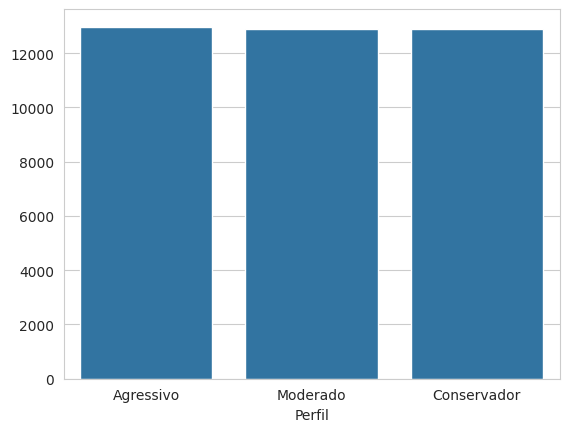

In [47]:
with sns.axes_style("whitegrid"):
    grafico = sns.barplot(x=questao_1.index, y=questao_1.values)

In [48]:
# - Mostre os 10 primeiros ids dos investidores de perfil Agressivo e Moderado.
df_cadastro_investimento["Perfil"].head(10)

id
id0000001       Moderado
id0000002       Moderado
id0000003      Agressivo
id0000004      Agressivo
id0000005    Conservador
id0000006      Agressivo
id0000007       Moderado
id0000008      Agressivo
id0000009      Agressivo
id0000010      Agressivo
Name: Perfil, dtype: object

In [52]:
# - Quantos investidores são do sexo feminino?
df_cadastro_investimento[df_cadastro_investimento["Sexo"] == "Feminino"]["Perfil"].count()

19385

In [56]:
# - Quantos investidores investiram mais de 16000 no Ativo04?
df_cadastro_investimento[df_cadastro_investimento["Ativo04"] > 16000]["Perfil"].count()

10689

In [58]:
# - Quantos investidores investiram mais de 16000 no Ativo04 e menos de 5000 no Ativo05?
df_cadastro_investimento[(df_cadastro_investimento["Ativo04"] > 16000) & (df_cadastro_investimento["Ativo05"] < 5000)]["Perfil"].count()

3684

In [62]:
# - Quais investidores do sexo feminino tem mais de 25 anos e seu investimento total foi menor que 10000? 
df_cadastro_investimento[(df_cadastro_investimento["Sexo"] == "Feminino") & (df_cadastro_investimento["Idade"] > 25) & (df_cadastro_investimento["total"] < 10000)]["Perfil"].count()

442

In [65]:
# - Quantos investidores tem em cada estado (dica: use groupby)
#df_cadastro_investimento["Estado"].value_counts()
grafico2 = df_cadastro_investimento.groupby("Estado").size()
grafico2

Estado
AC    1435
AL    1376
AM    1495
AP    1438
BA    1484
CE    1465
DF    1470
ES    1472
GO    1394
MA    1454
MG    1407
MS    1436
MT    1390
PA    1421
PB    1405
PE    1477
PI    1503
PR    1371
RJ    1466
RN    1472
RO    1440
RR    1495
RS    1393
SC    1430
SE    1319
SP    1464
TO    1382
dtype: int64

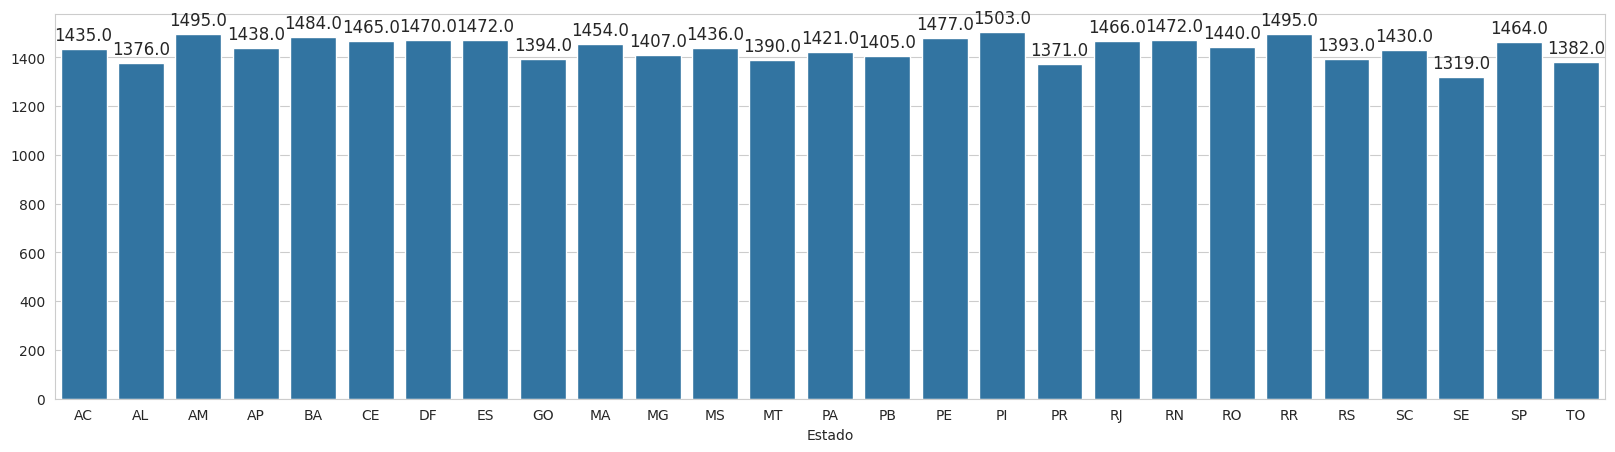

In [70]:
with sns.axes_style("whitegrid"):
    grafico = sns.barplot(x=grafico2.index, y=grafico2.values)
    grafico.figure.set_size_inches(20, 5)

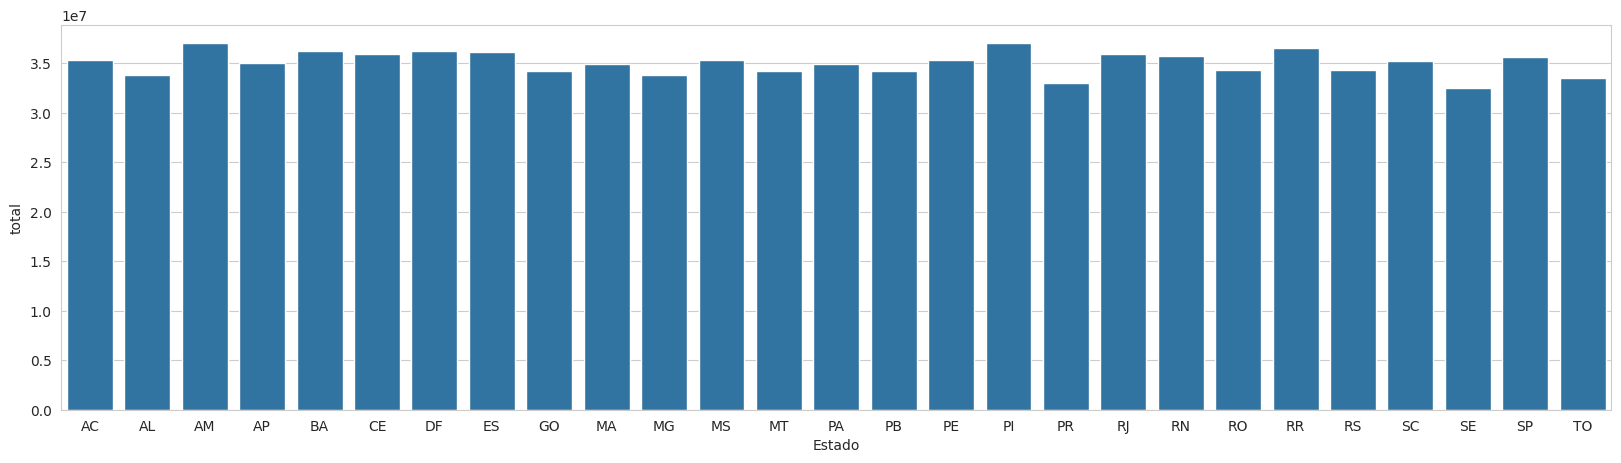

In [75]:
#- Qual é a soma do total investido por cada estado?
grafico3 = df_cadastro_investimento[["Estado", "total"]].groupby("Estado").sum()
with sns.axes_style("whitegrid"):
    grafico = sns.barplot(x=grafico3.index, y=grafico3["total"])
    grafico.figure.set_size_inches(20, 5)

In [78]:
#- Qual é a média do total investido por promotores, detratores e neutros? E como se dividem nos estados
df_cadastro_investimento[["NPS", "total"]].groupby("NPS").mean()

,total
NPS,
detrator,24389.706133
neutro,24496.088985
promotor,24261.049125


In [83]:
df_cadastro_investimento[["NPS", "total", "Estado"]].groupby(["Estado", "NPS"]).mean()

total
Estado NPS                   
AC     detrator  24756.253232
       neutro    24316.072621
       promotor  25463.025496
AL     detrator  24647.073488
       neutro    24352.010897
...                       ...
SP     neutro    24301.115431
       promotor  24408.522314
TO     detrator  23937.926221
       neutro    25055.921996
       promotor  22393.722365

[81 rows x 1 columns]

In [91]:
#- Crie 3 colunas "dummies" do perfil dos investidores
# df_dummies = pd.get_dummies(df['Categoria'], columns=['Categoria_A', 'Categoria_B', 'Categoria_C'])
df_cadastro_investimento = pd.concat([df_cadastro_investimento, pd.get_dummies(df_cadastro_investimento["Perfil"])], axis=1)

In [92]:
df_cadastro_investimento.head()

,Nome,Sexo,Nasc,Idade,Email,Lat_long,Job,Estado,Renda,Perfil,Ativo01,Ativo02,Ativo03,Ativo04,Ativo05,Ativo06,Ativo07,Nota1,Nota2,total,Media,Dominio,NPS,Agressivo,Conservador,Moderado
id,,,,,,,,,,,,,,,,,,,,,,,,,,
id0000001,Eunice Hellen do Vale,Feminino,1970-11-12,51,djones@yahoo.com,"(Decimal('24.7024355'), Decimal('-28.038258'))",Technical author,TO,63.67,Moderado,1174.27,4980.98,2638.24,NaN,4480.91,2329.72,480.72,79.600372,9.802620,16084.84,44.701496,yahoo.com,detrator,False,False,True
id0000002,Sebastião Castelo Branco Júnior,Masculino,2019-12-10,2,barnesandrea@yahoo.com,"(Decimal('21.8589875'), Decimal('122.830566'))","Biochemist, clinical",DF,21.96,Moderado,842.12,5646.09,3336.07,NaN,5624.22,2669.98,504.17,44.406893,90.512871,18622.65,67.459882,yahoo.com,neutro,False,False,True
id0000003,Romildo Fábio de Carvalho,Masculino,2015-12-28,6,walkermichael@yahoo.com,"(Decimal('-28.2161525'), Decimal('97.140529'))","Development worker, international aid",DF,62497.64,Agressivo,818.81,5516.52,3396.64,NaN,5033.83,2229.45,523.12,44.020024,65.060941,17518.37,54.540483,yahoo.com,neutro,True,False,False
id0000004,Lana Albina de Lemos Mumy,Feminino,1993-05-03,28,cobbangela@hotmail.com,"(Decimal('-40.8557635'), Decimal('-2.936099'))",Estate manager/land agent,DF,99878.74,Agressivo,NaN,5258.69,3723.10,NaN,5933.91,NaN,486.05,25.597924,86.548918,15401.75,56.073421,hotmail.com,neutro,True,False,False
id0000005,Rose Elisângela Vyrnium de Moura,Feminino,1984-06-10,37,crawfordcraig@yahoo.com,"(Decimal('-20.2620885'), Decimal('104.349223'))",Chartered public finance accountant,MS,188.01,Conservador,1505.16,6415.30,3462.67,30841.35,6044.86,2198.89,512.98,14.463307,33.566292,50981.21,24.014800,yahoo.com,detrator,False,True,False


In [100]:
# - Crie uma tabela com total de investimentos de promotores, detratores e neutros em função do perfil. (dica: use pivot_table)
df_cadastro_investimento[["NPS", "Perfil", "total"]].pivot_table(values="total", index="NPS", columns="Perfil", aggfunc="sum", fill_value=0)

Perfil,Agressivo,Conservador,Moderado
NPS,,,
detrator,1.596611e+08,1.615007e+08,1.572179e+08
neutro,1.280908e+08,1.243313e+08,1.265814e+08
promotor,3.043271e+07,2.839878e+07,3.015804e+07


In [103]:
df_cadastro_investimento[["NPS", "Perfil", "total"]].groupby(["NPS", "Perfil"]).sum()

total
NPS      Perfil                   
detrator Agressivo    1.596611e+08
         Conservador  1.615007e+08
         Moderado     1.572179e+08
neutro   Agressivo    1.280908e+08
         Conservador  1.243313e+08
         Moderado     1.265814e+08
promotor Agressivo    3.043271e+07
         Conservador  2.839878e+07
         Moderado     3.015804e+07